# Lead Scoring Case Study

## 1) Impoting all the necessary libraries

In [694]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

## 2) Reading dataset

In [695]:
leads = pd.read_csv("Leads.csv")

In [696]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [697]:
leads.shape

(9240, 37)

In [698]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 3) Exploratoty Data Analysis

### 1) Treating missing values

In [699]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

###### Checking percentage of missing values

In [700]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [701]:
leads['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

##### Dropping columns with more than 25% of missing values. 
###### Dropping columns Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, Tags and Lead Quality

In [702]:
leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','Lead Quality'],axis=1,inplace=True)

In [703]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


###### Cheking all categotical columns for entries with value Select
###### Select looks to be dropdown where nothing was selected. It can be considered as null and treated accordingly

In [704]:
categorical_cols = list(leads.columns[leads.dtypes == 'object'])

In [705]:
categorical_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [706]:
for i in categorical_cols:
    print(leads[i].values)

['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
['API' 'API' 'Landing Page Submission' ... 'Landing Page Submission'
 'Landing Page Submission' 'Landing Page Submission']
['Olark Chat' 'Organic Search' 'Direct Traffic' ... 'Direct Traffic'
 'Google' 'Direct Traffic']
['No' 'No' 'No' ... 'Yes' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Page Visited on Website' 'Email Opened' 'Email Opened' ... 'SMS Sent'
 'SMS Sent' 'SMS Sent']
[nan 'India' 'India' ... 'India' 'India' 'Bangladesh']
['Select' 'Select' 'Business Administration' ... 'Business Administration'
 'Human Resource Management' 'Supply Chain Management']
['Select' 'Select' 'Select' ... 'Select' 'Online Search' 'Select']
['Unemployed' 'Unemployed' 'Student' ... 'Unemployed' nan 'Unemployed']
['Better Career Prospects' 'Better Career

###### Few of the columns have the select value. Extracting the columns which have select level in them.

In [707]:
for i in categorical_cols:
    if 'Select' in leads[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [708]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [709]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [710]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [711]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

###### Updating the level select to null in Specialization, How did you hear about X Education, Lead Profile and City columns

In [712]:
def update_select(value):
    if value=='Select':
        return np.nan
    else:
        return value
        

In [713]:
leads['Specialization'] = leads['Specialization'].apply(update_select)

In [714]:
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].apply(update_select)

In [715]:
leads['Lead Profile'] = leads['Lead Profile'].apply(update_select)

In [716]:
leads['City'] = leads['City'].apply(update_select)

In [717]:
leads.isna().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

###### After replacing the Select value, 4 columns have more than 40% of missing values
###### Dropping columns Specialization, How did you hear about X Education, Lead Profile and City

In [718]:
leads.drop(['Specialization','How did you hear about X Education','Lead Profile','City'],axis=1,inplace=True)

In [719]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


###### Dropping rows with missing data

In [720]:
leads = leads[~(leads['What is your current occupation'].isnull())]

In [721]:
leads = leads[~(leads['Country'].isnull())]

In [722]:
leads = leads[~(leads['What matters most to you in choosing a course'].isnull())]

In [723]:
leads = leads[~leads['Lead Source'].isnull()]

In [724]:
leads.isna().sum()/len(leads)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [725]:
leads.shape

(4925, 27)

In [726]:
len(leads['Prospect ID'].unique())

4925

In [727]:
len(leads['Lead Number'].unique())

4925

###### Columns Prospect ID and Lead Number will not be useful for model building. Can be dropped.

In [728]:
leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [729]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 1 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    4925 non-null   object 
 1   Lead Source                                    4925 non-null   object 
 2   Do Not Email                                   4925 non-null   object 
 3   Do Not Call                                    4925 non-null   object 
 4   Converted                                      4925 non-null   int64  
 5   TotalVisits                                    4925 non-null   float64
 6   Total Time Spent on Website                    4925 non-null   int64  
 7   Page Views Per Visit                           4925 non-null   float64
 8   Last Activity                                  4925 non-null   object 
 9   Country                                        4925 

### 2) Univariate Analysis
#### Univariate analysis of continuous variables

<AxesSubplot:xlabel='TotalVisits'>

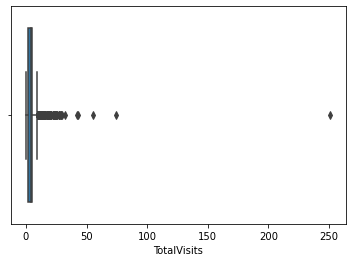

In [730]:
sns.boxplot(leads['TotalVisits'])

<AxesSubplot:ylabel='Page Views Per Visit'>

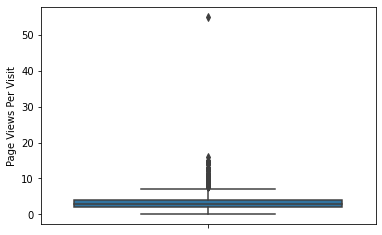

In [731]:
sns.boxplot(y=leads['Page Views Per Visit'])

In [732]:
leads[(leads['TotalVisits'] > 50)]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2190,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,Page Visited on Website,India,...,No,No,No,No,No,No,No,No,Yes,Modified
5283,Landing Page Submission,Direct Traffic,Yes,No,0,74.0,1209,12.33,Page Visited on Website,India,...,No,No,No,No,No,No,No,No,No,Page Visited on Website
6102,Landing Page Submission,Direct Traffic,No,No,1,251.0,49,1.48,Page Visited on Website,India,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website


In [733]:
leads[leads['Page Views Per Visit'] > 20]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2190,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.0,Page Visited on Website,India,...,No,No,No,No,No,No,No,No,Yes,Modified


In [734]:
leads = leads[~(leads['TotalVisits'] > 20)]

In [735]:
leads = leads[~(leads['Page Views Per Visit'] > 50)]

<AxesSubplot:xlabel='TotalVisits'>

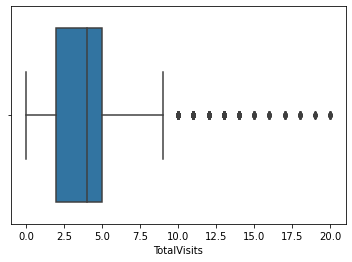

In [736]:
sns.boxplot(leads['TotalVisits'])

<AxesSubplot:ylabel='Page Views Per Visit'>

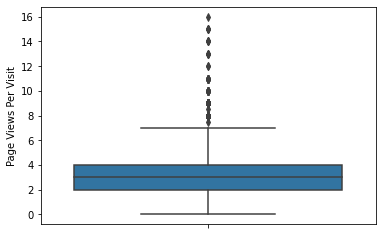

In [737]:
sns.boxplot(y=leads['Page Views Per Visit'])

<AxesSubplot:ylabel='Total Time Spent on Website'>

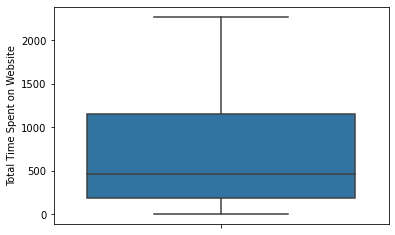

In [738]:
sns.boxplot(y=leads['Total Time Spent on Website'])

###### Out of three continuous variables below two vaiables have outliers
###### 1) TotalVisits
###### 2) Page Views Per Visit
###### To fix outliers, dropped few rows above acceptable value

###### Univariate analysis of categorical variables

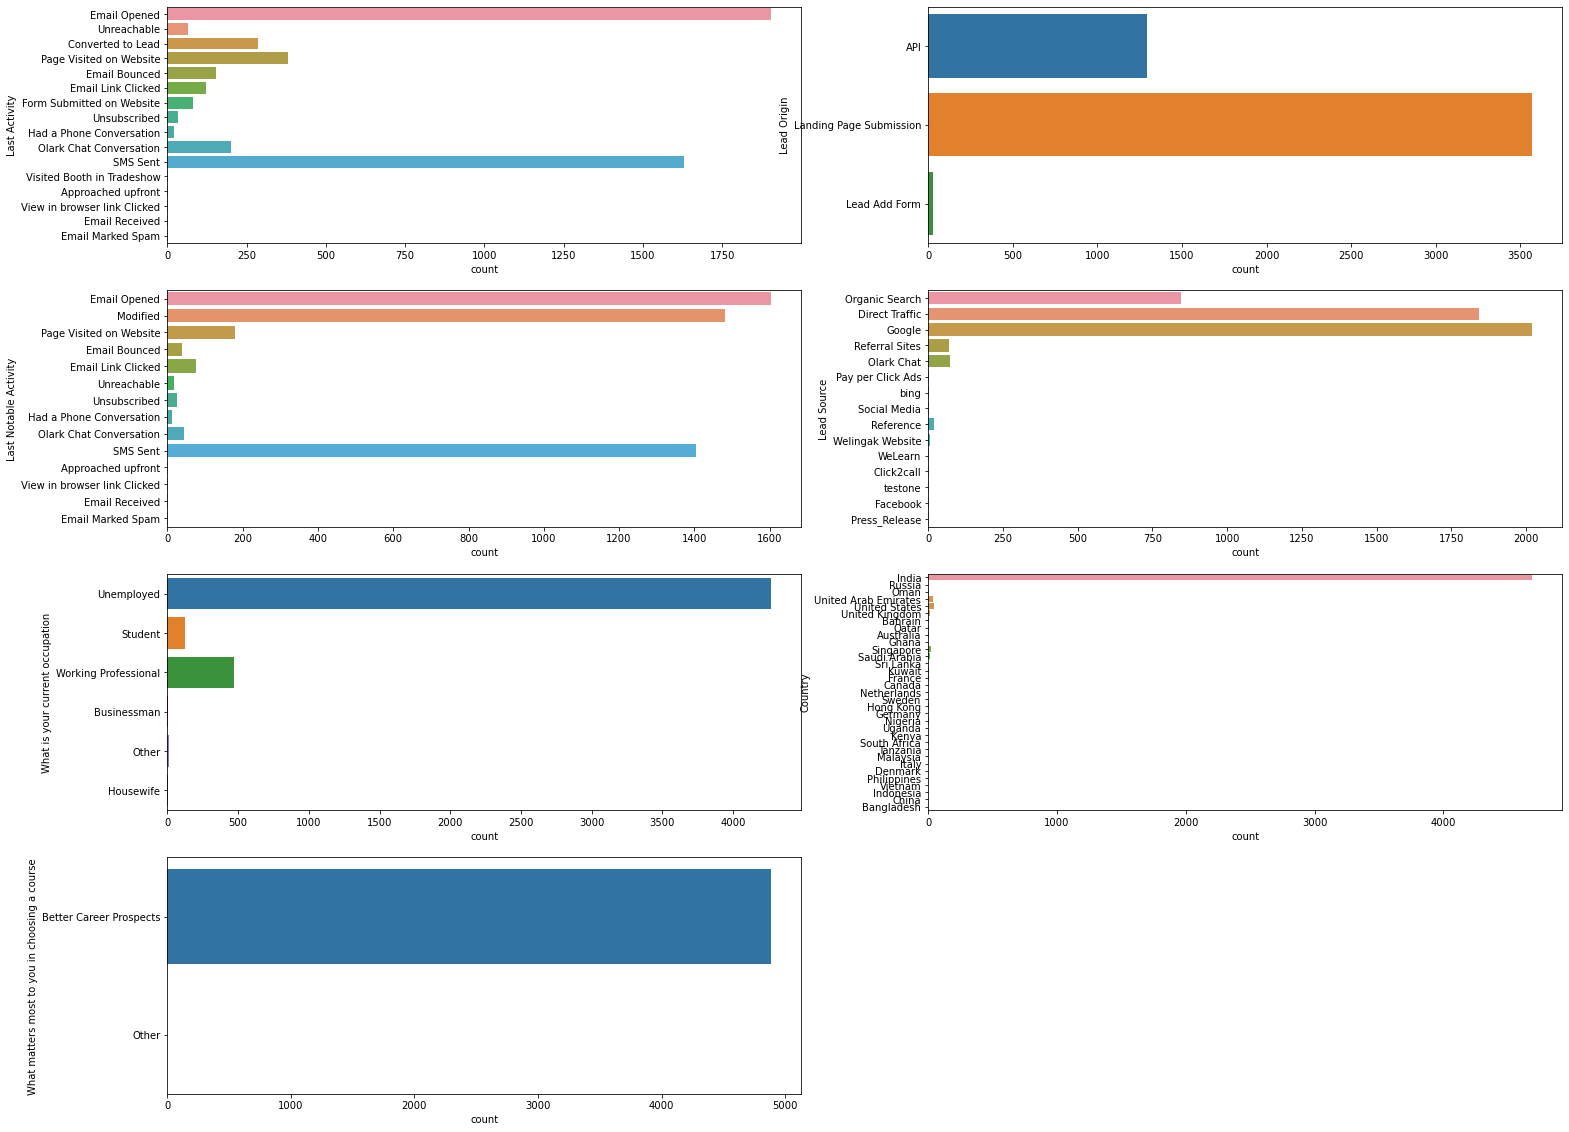

In [739]:
plt.figure(figsize=(25,20))
plt.subplot(4,2,1)
sns.countplot(data=leads,y='Last Activity')
plt.subplot(4,2,2)
sns.countplot(data=leads,y='Lead Origin')
plt.subplot(4,2,3)
sns.countplot(data=leads,y='Last Notable Activity')
plt.subplot(4,2,4)
sns.countplot(data=leads,y='Lead Source')
plt.subplot(4,2,5)
sns.countplot(data=leads,y='What is your current occupation')
plt.subplot(4,2,6)
sns.countplot(data=leads,y='Country')
plt.subplot(4,2,7)
sns.countplot(data=leads,y='What matters most to you in choosing a course')
plt.show()
    

#### Outcome of univariate analysis
##### 1) Majority of lead origins are of Landing page submission
##### 2) Majority of Lead source are from Google
##### 3) Most of the lead's last activity was Email Opened and SMS sent

#### Univariate analysis of binary categorical variables

In [740]:
categorical_cols = list(leads.columns[leads.dtypes == 'object'])

In [741]:
categorical_cols.remove('Lead Origin')

In [742]:
categorical_cols.remove('Last Activity')

In [743]:
categorical_cols.remove('Last Notable Activity')

In [744]:
categorical_cols.remove('Lead Source')

In [745]:
categorical_cols.remove('Country')

In [746]:
categorical_cols.remove('What is your current occupation')

In [747]:
categorical_cols.remove('What matters most to you in choosing a course')

In [748]:
for i in categorical_cols:
    print(leads[i].value_counts())

No     4530
Yes     359
Name: Do Not Email, dtype: int64
No     4888
Yes       1
Name: Do Not Call, dtype: int64
No     4879
Yes      10
Name: Search, dtype: int64
No    4889
Name: Magazine, dtype: int64
No     4888
Yes       1
Name: Newspaper Article, dtype: int64
No    4889
Name: X Education Forums, dtype: int64
No     4888
Yes       1
Name: Newspaper, dtype: int64
No     4886
Yes       3
Name: Digital Advertisement, dtype: int64
No     4883
Yes       6
Name: Through Recommendations, dtype: int64
No    4889
Name: Receive More Updates About Our Courses, dtype: int64
No    4889
Name: Update me on Supply Chain Content, dtype: int64
No    4889
Name: Get updates on DM Content, dtype: int64
No    4889
Name: I agree to pay the amount through cheque, dtype: int64
No     2756
Yes    2133
Name: A free copy of Mastering The Interview, dtype: int64


###### Columns Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content and Get updates on DM Content have majority of values are No. These columns will not be useful for the model. Dropping these columns

In [749]:
leads.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'],axis=1,inplace=True)

### 2) Bivariate Analysis

In [750]:
converted = leads[leads.Converted == 1]

In [751]:
converted.shape

(2160, 14)

In [752]:
Notconverted = leads[leads.Converted == 0]

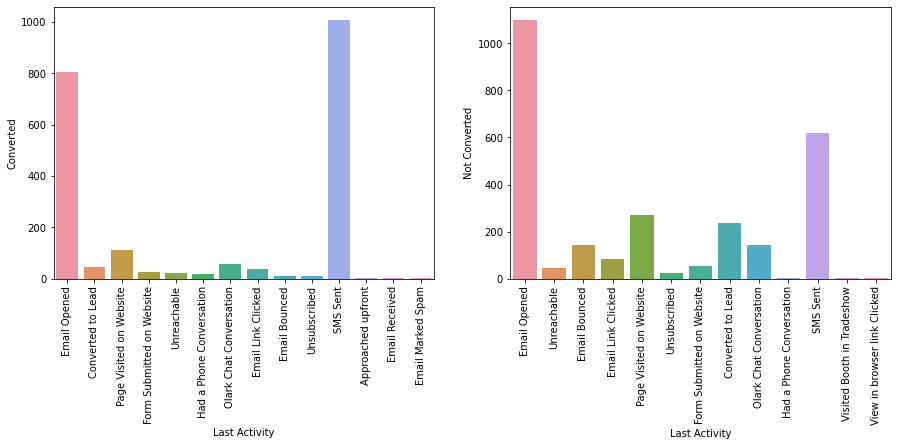

In [753]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=converted,x='Last Activity')
plt.xticks(rotation=90)
plt.ylabel('Converted')
plt.subplot(1,2,2)
sns.countplot(data=Notconverted,x='Last Activity')
plt.xticks(rotation=90)
plt.ylabel('Not Converted')
plt.show()

###### Last activity SMS sent has more percentage conversion than Email Opened

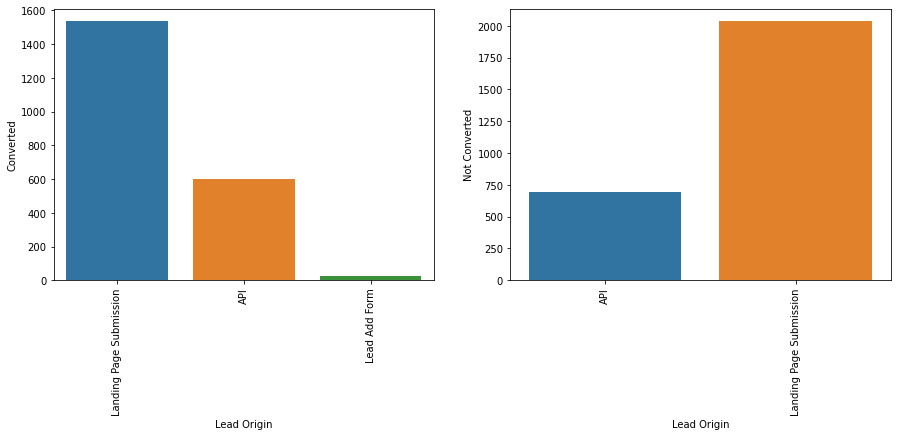

In [754]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=converted,x='Lead Origin')
plt.xticks(rotation=90)
plt.ylabel('Converted')
plt.subplot(1,2,2)
sns.countplot(data=Notconverted,x='Lead Origin')
plt.xticks(rotation=90)
plt.ylabel('Not Converted')
plt.show()

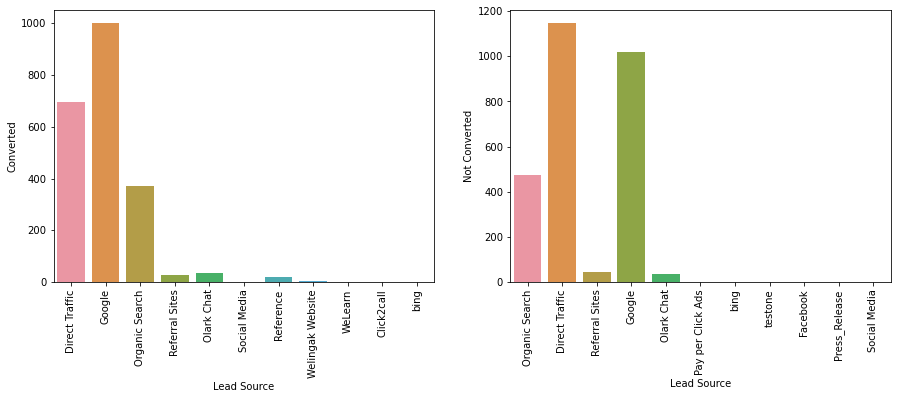

In [755]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=converted,x='Lead Source')
plt.xticks(rotation=90)
plt.ylabel('Converted')
plt.subplot(1,2,2)
sns.countplot(data=Notconverted,x='Lead Source')
plt.xticks(rotation=90)
plt.ylabel('Not Converted')
plt.show()

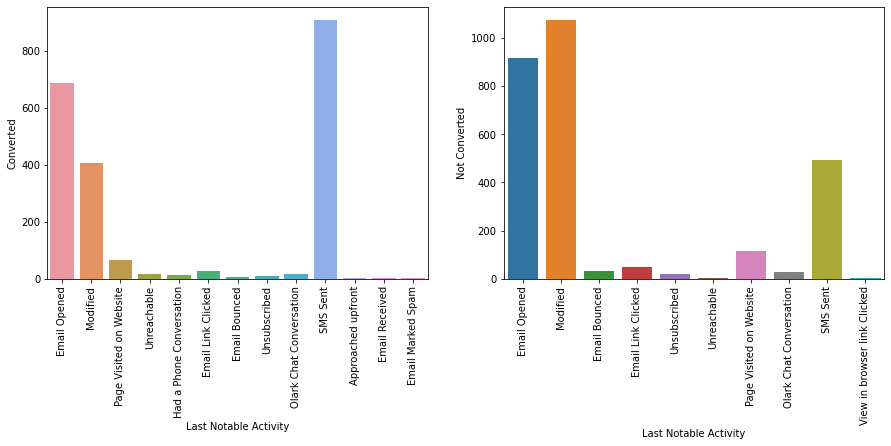

In [756]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=converted,x='Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('Converted')
plt.subplot(1,2,2)
sns.countplot(data=Notconverted,x='Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('Not Converted')
plt.show()

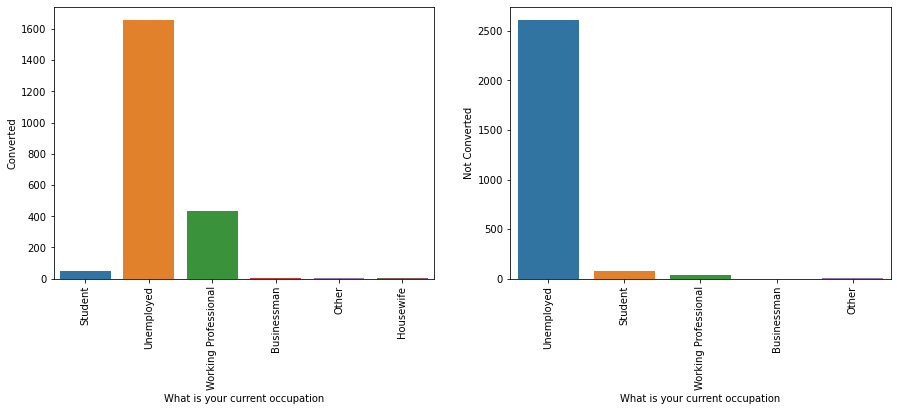

In [757]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=converted,x='What is your current occupation')
plt.xticks(rotation=90)
plt.ylabel('Converted')
plt.subplot(1,2,2)
sns.countplot(data=Notconverted,x='What is your current occupation')
plt.xticks(rotation=90)
plt.ylabel('Not Converted')
plt.show()

###### For Working Professionals more conversion is observed. This class looks to be significant.

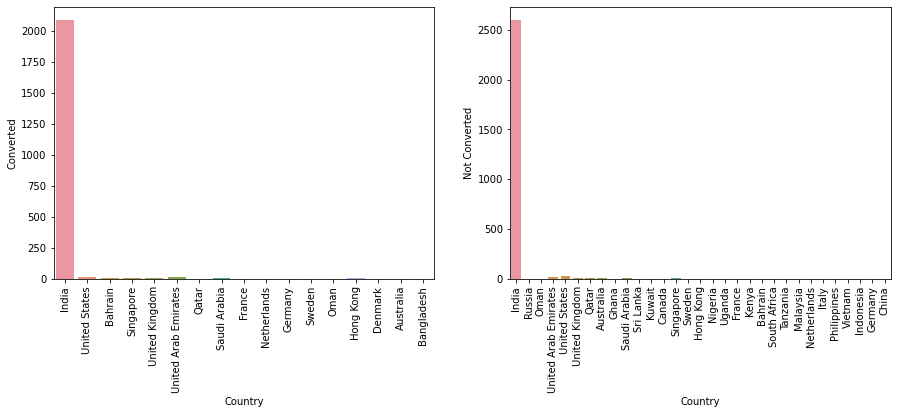

In [758]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=converted,x='Country')
plt.xticks(rotation=90)
plt.ylabel('Converted')
plt.subplot(1,2,2)
sns.countplot(data=Notconverted,x='Country')
plt.xticks(rotation=90)
plt.ylabel('Not Converted')
plt.show()

###### Majority on values in country column is india. This columns can be dropped as it will not make difference in outcome.

In [759]:
leads.drop(['Country'],axis=1,inplace=True)

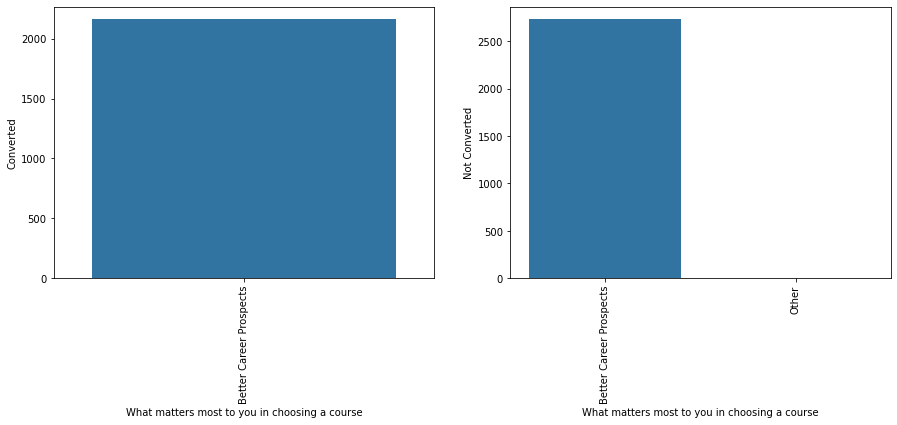

In [760]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=converted,x='What matters most to you in choosing a course')
plt.xticks(rotation=90)
plt.ylabel('Converted')
plt.subplot(1,2,2)
sns.countplot(data=Notconverted,x='What matters most to you in choosing a course')
plt.xticks(rotation=90)
plt.ylabel('Not Converted')
plt.show()

###### Majority on values in (What matters most to you in choosing a course) column is Better Carrer Prospects. This columns can be dropped as it will not make difference in outcome.

In [761]:
leads.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

##### With above analysis below columns looks to be more significant
##### 1) What is your current occupation (Working Professionals)
##### 2) Last activity (SMS sent)
##### 3) Lead Origin (Landing page submission)

## 4) Data Pre-Processing

#### 1) Binary Encoding
###### Converting data in colums with True and False values to (1 and 0) Respectively

In [762]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4889 entries, 1 to 9239
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               4889 non-null   object 
 1   Lead Source                               4889 non-null   object 
 2   Do Not Email                              4889 non-null   object 
 3   Converted                                 4889 non-null   int64  
 4   TotalVisits                               4889 non-null   float64
 5   Total Time Spent on Website               4889 non-null   int64  
 6   Page Views Per Visit                      4889 non-null   float64
 7   Last Activity                             4889 non-null   object 
 8   What is your current occupation           4889 non-null   object 
 9   I agree to pay the amount through cheque  4889 non-null   object 
 10  A free copy of Mastering The Intervi

In [763]:
categorical_cols = ['Do Not Email','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

In [764]:
for i in categorical_cols:
    leads[i] = leads[i].map({'Yes':1,'No':0})

In [765]:
for i in categorical_cols:
    print(leads[i].value_counts())

0    4530
1     359
Name: Do Not Email, dtype: int64
0    4889
Name: I agree to pay the amount through cheque, dtype: int64
0    2756
1    2133
Name: A free copy of Mastering The Interview, dtype: int64


In [766]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4889 entries, 1 to 9239
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               4889 non-null   object 
 1   Lead Source                               4889 non-null   object 
 2   Do Not Email                              4889 non-null   int64  
 3   Converted                                 4889 non-null   int64  
 4   TotalVisits                               4889 non-null   float64
 5   Total Time Spent on Website               4889 non-null   int64  
 6   Page Views Per Visit                      4889 non-null   float64
 7   Last Activity                             4889 non-null   object 
 8   What is your current occupation           4889 non-null   object 
 9   I agree to pay the amount through cheque  4889 non-null   int64  
 10  A free copy of Mastering The Intervi

#### 1) One-Hot Encoding for non binary columns

In [767]:
dummy_data = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','Last Notable Activity','What is your current occupation']],drop_first=True)

In [768]:
merged_df = pd.concat([leads,dummy_data],axis=1)

In [769]:
merged_df.shape

(4889, 61)

In [770]:
merged_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,I agree to pay the amount through cheque,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,0,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,...,0,0,0,0,0,0,0,0,1,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,Unemployed,0,...,0,0,0,0,0,0,0,0,1,0


#### Drop redundant columns

In [771]:
merged_df.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity','What is your current occupation'],axis=1,inplace=True)

In [772]:
merged_df.shape

(4889, 56)

<AxesSubplot:>

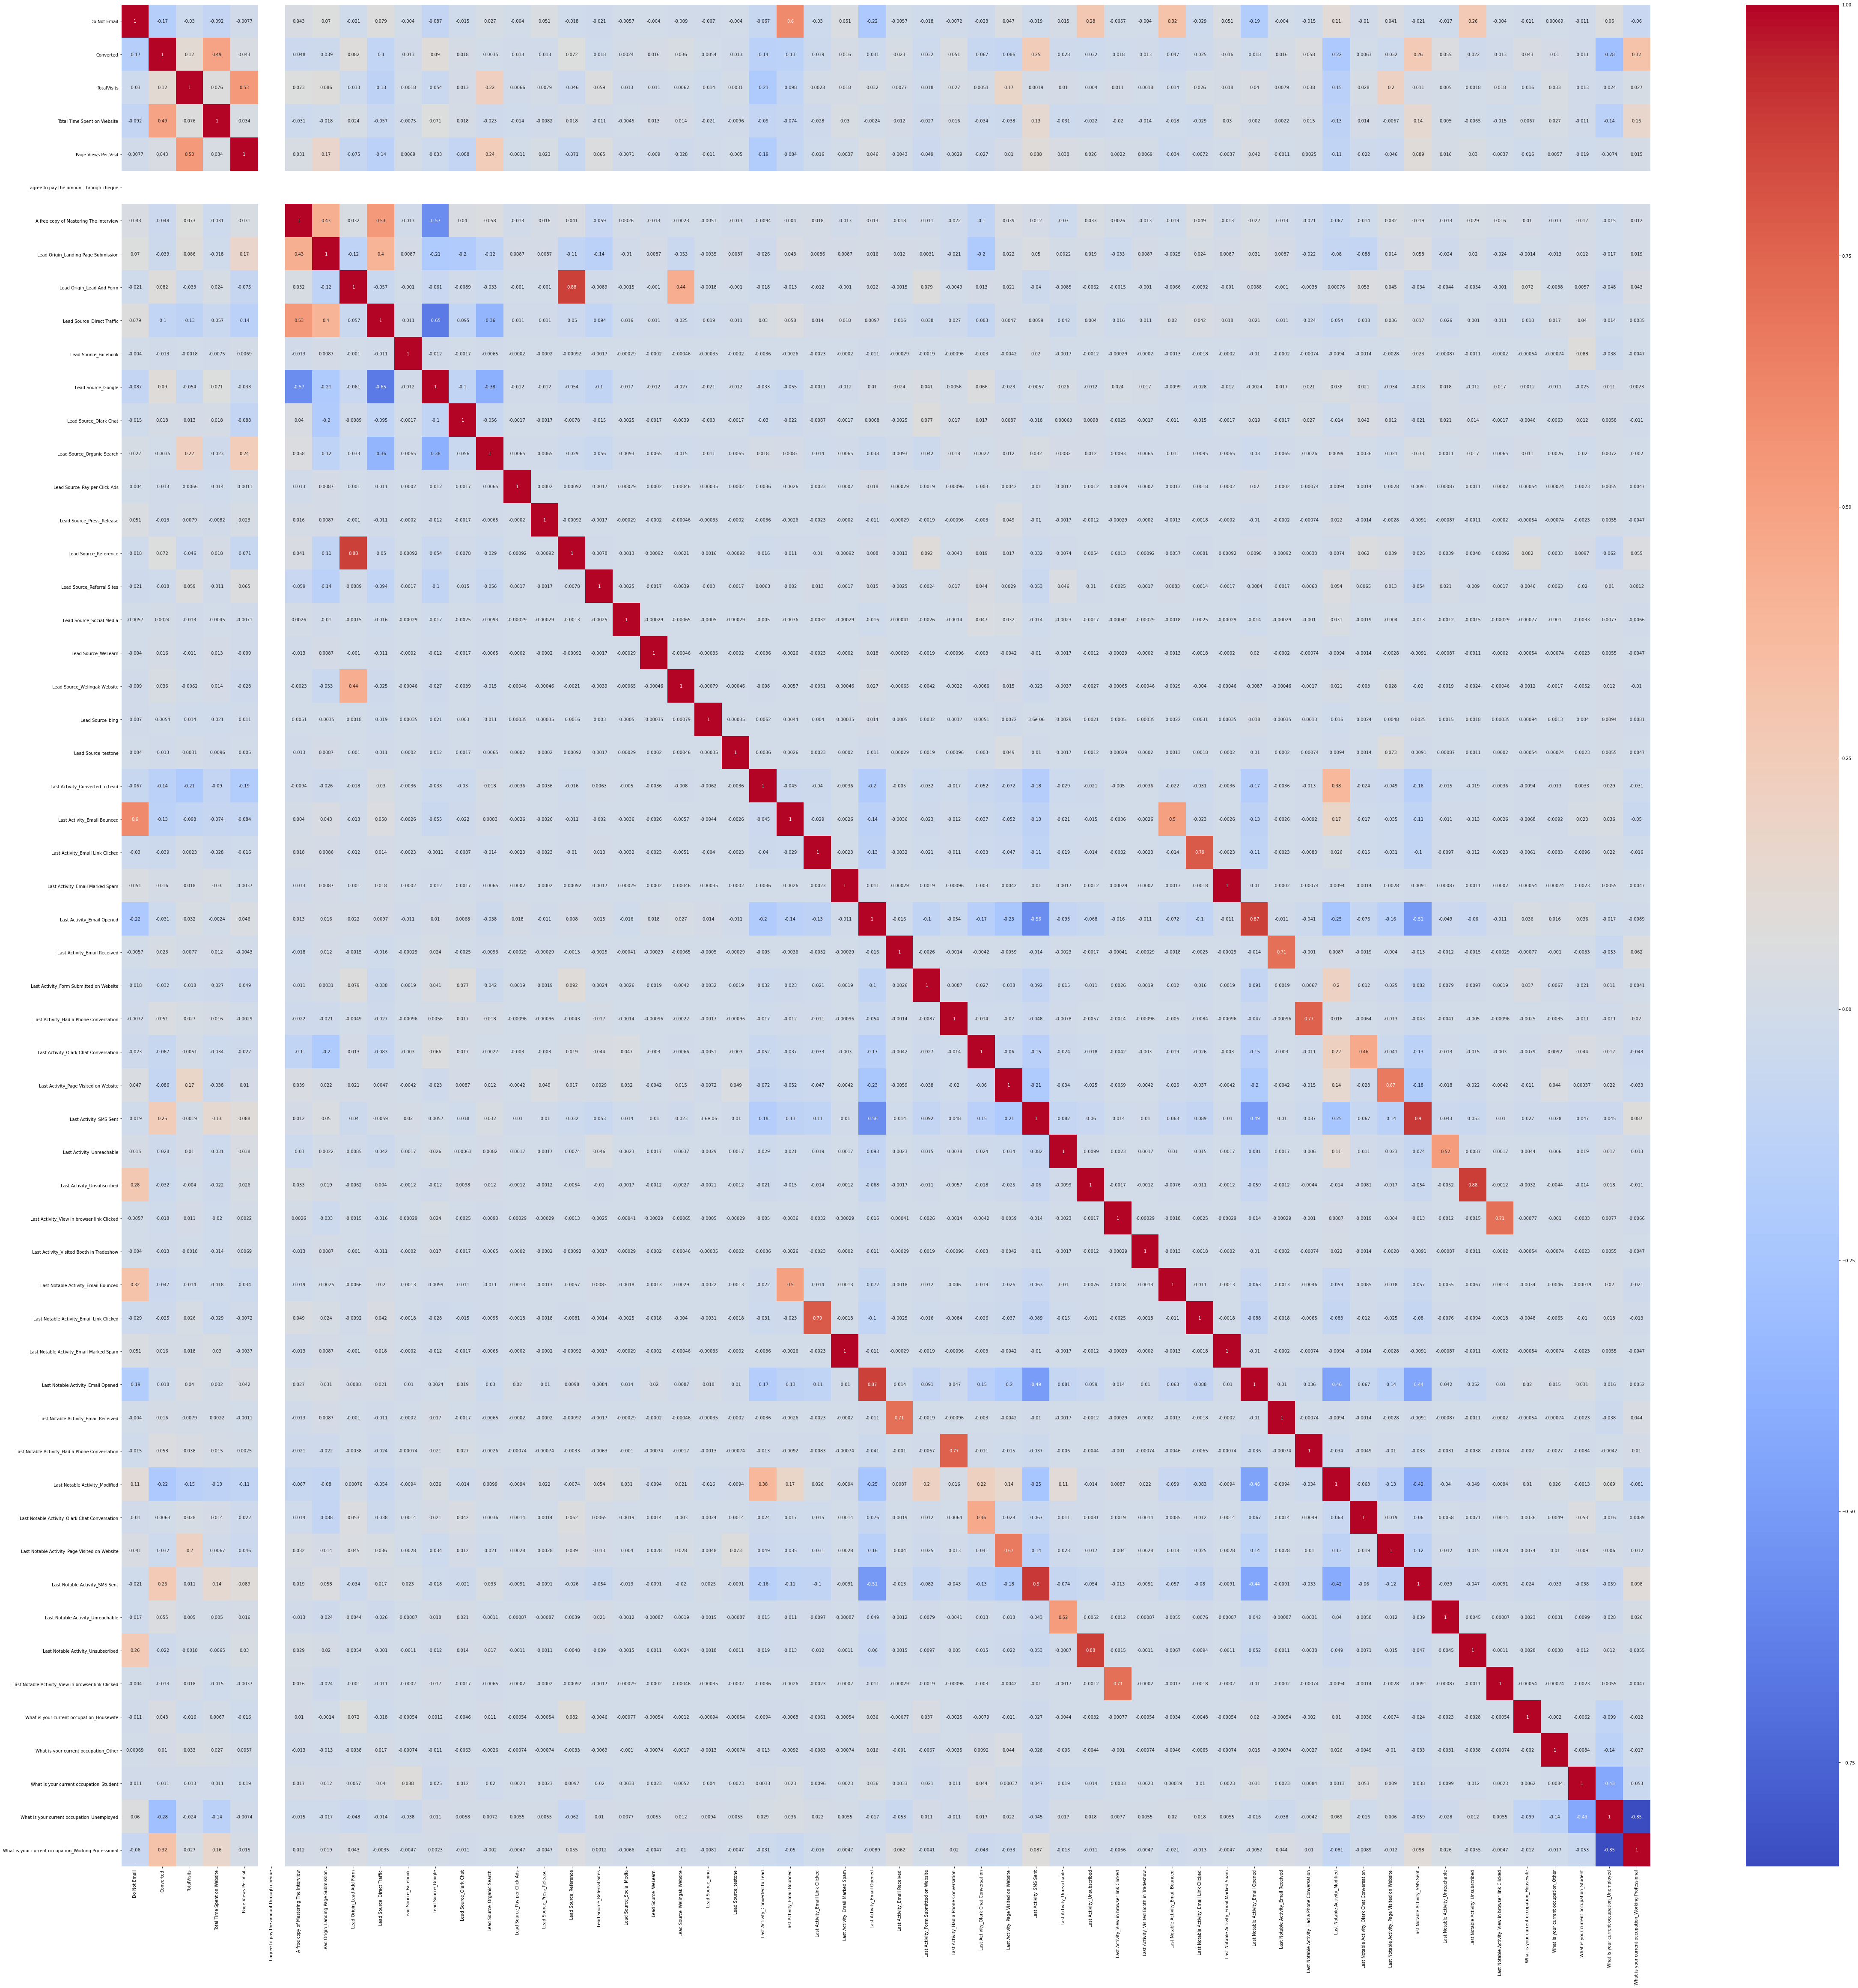

In [773]:
plt.figure(figsize=(80,80))
sns.heatmap(merged_df.corr(),annot=True,cmap='coolwarm')

#### As per above heat map, few of the colums have high correlation. With RFE we will select the most significant variables.

#### 3) Splitting data set to test and train

In [774]:
df_train, df_test = train_test_split(merged_df,train_size=0.7,random_state=100)

In [775]:
df_train.shape

(3422, 56)

In [776]:
df_test.shape

(1467, 56)

#### 4) Scaling continuous columns with standard scaler

In [777]:
scaler = StandardScaler()

In [778]:
df_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(df_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [779]:
df_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
8708,0,0,-0.806800,-0.639874,-0.641045,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
567,0,0,-0.138955,-0.630840,0.467889,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1404,0,1,0.194967,-1.050040,1.022356,0,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4025,0,1,-0.472878,1.591641,-0.086578,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
7751,0,0,-0.472878,-0.368840,-0.086578,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## 5) Model building

In [780]:
y_train = df_train.pop('Converted')

In [781]:
X_train = df_train

In [782]:
lm = LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression()

In [783]:
rfe = RFE(lm,15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [784]:
X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [785]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('I agree to pay the amount through cheque', False, 34),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', False, 20),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 31),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Social Media', False, 12),
 ('Lead Source_WeLearn', False, 35),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 17),
 ('Lead Source_testone', False, 40),
 ('Last Activity_Converted to Lead', False, 3),
 ('Last Activity_Email Bounced', False, 1

In [786]:
X_train = X_train[X_train.columns[rfe.support_]]

In [787]:
X_train.shape

(3422, 15)

In [788]:
X_train.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
8708,0,-0.639874,0,0,0,0,0,0,0,1,0,0,0,1,0
567,0,-0.630840,0,0,0,0,0,0,0,0,0,0,0,1,0
1404,0,-1.050040,0,0,0,0,1,0,0,0,0,0,0,1,0
4025,0,1.591641,0,0,0,0,0,0,0,0,0,0,0,1,0
7751,0,-0.368840,0,0,0,0,0,0,0,1,0,0,0,1,0


#### 1) First Model

In [789]:
X_train_sm = sm.add_constant(X_train)
lr = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3422
Model:                            GLM   Df Residuals:                     3407
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1583.3
Date:                Sat, 16 Sep 2023   Deviance:                       3166.5
Time:                        23:09:00   Pearson chi2:                 3.26e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3204      0.636     -0.504      0.614      -1.567       0.926
Do Not Email                                            -1.5708      0.226     -6.936      0.000      -2.015      -1.127
Total Time Spent on Website                              1.1150      0.047     23.476      0.000       1.022       1.208
Lead Origin_Lead Add Form                               16.0014   1.29e+04      0.001      0.999   -2.53e+04    2.53e+04
Lead Source_Reference                                    7.8355   1.66e+04      0.000      1.000   -3.26e+04    3.26e+04
Lead Source_Welingak Website                             8.1660   2.36e+04      0.000      1.000   -4.62e+04    4.62e+04
Last Activity_Had a Phone Conversation                   1.5896      1.007      1.578      0.114      -0.384       3.563
Last Activity_SMS Sent                                   1.0612      0.095     11.181      0.000       0.875       1.247
Last Activity_Unsubscribed                               1.3012      0.581      2.239      0.025       0.162       2.440
Last Notable Activity_Had a Phone Conversation          22.4472      2e+04      0.001      0.999   -3.91e+04    3.92e+04
Last Notable Activity_Modified                          -0.6744      0.102     -6.618      0.000      -0.874      -0.475
Last Notable Activity_Unreachable                        2.8417      1.100      2.583      0.010       0.685       4.998
What is your current occupation_Housewife               24.1987   4.75e+04      0.001      1.000   -9.31e+04    9.32e+04
What is your current occupation_Student                 -0.1474      0.693     -0.213      0.831      -1.505       1.210
What is your current occupation_Unemployed              -0.2525      0.636     -0.397      0.691      -1.498       0.993
What is your current occupation_Working Professional     2.8241      0.682      4.143      0.000       1.488       4.160
========================================================================================================================
"""

In [790]:
VIF = pd.DataFrame()
VIF['cols'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
VIF

,cols,vif
0,Do Not Email,1.211505
1,Total Time Spent on Website,1.061369
2,Lead Origin_Lead Add Form,inf
3,Lead Source_Reference,inf
4,Lead Source_Welingak Website,inf
5,Last Activity_Had a Phone Conversation,2.450668
6,Last Activity_SMS Sent,1.651367
7,Last Activity_Unsubscribed,1.107668
8,Last Notable Activity_Had a Phone Conversation,2.444398
9,Last Notable Activity_Modified,1.596102


#### Lead Source_Reference has high P value and high VIF. Dropping the coumn

In [791]:
X_train.drop(['Lead Source_Reference'],axis=1,inplace=True)

#### 2) Second model

In [792]:
X_train_sm = sm.add_constant(X_train)
lr = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3422
Model:                            GLM   Df Residuals:                     3407
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1583.3
Date:                Sat, 16 Sep 2023   Deviance:                       3166.5
Time:                        23:09:00   Pearson chi2:                 3.26e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3204      0.636     -0.504      0.614      -1.567       0.926
Do Not Email                                            -1.5708      0.226     -6.936      0.000      -2.015      -1.127
Total Time Spent on Website                              1.1150      0.047     23.476      0.000       1.022       1.208
Lead Origin_Lead Add Form                               23.8369   1.82e+04      0.001      0.999   -3.56e+04    3.56e+04
Lead Source_Welingak Website                             0.3305   3.87e+04   8.54e-06      1.000   -7.58e+04    7.58e+04
Last Activity_Had a Phone Conversation                   1.5896      1.007      1.578      0.114      -0.384       3.563
Last Activity_SMS Sent                                   1.0612      0.095     11.181      0.000       0.875       1.247
Last Activity_Unsubscribed                               1.3012      0.581      2.239      0.025       0.162       2.440
Last Notable Activity_Had a Phone Conversation          22.4472      2e+04      0.001      0.999   -3.91e+04    3.92e+04
Last Notable Activity_Modified                          -0.6744      0.102     -6.618      0.000      -0.874      -0.475
Last Notable Activity_Unreachable                        2.8417      1.100      2.583      0.010       0.685       4.998
What is your current occupation_Housewife               24.1987   4.75e+04      0.001      1.000   -9.31e+04    9.32e+04
What is your current occupation_Student                 -0.1474      0.693     -0.213      0.831      -1.505       1.210
What is your current occupation_Unemployed              -0.2525      0.636     -0.397      0.691      -1.498       0.993
What is your current occupation_Working Professional     2.8241      0.682      4.143      0.000       1.488       4.160
========================================================================================================================
"""

In [793]:
VIF = pd.DataFrame()
VIF['cols'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
VIF

,cols,vif
0,Do Not Email,1.211505
1,Total Time Spent on Website,1.061369
2,Lead Origin_Lead Add Form,1.450309
3,Lead Source_Welingak Website,1.402080
4,Last Activity_Had a Phone Conversation,2.450668
5,Last Activity_SMS Sent,1.651367
6,Last Activity_Unsubscribed,1.107668
7,Last Notable Activity_Had a Phone Conversation,2.444398
8,Last Notable Activity_Modified,1.596102
9,Last Notable Activity_Unreachable,1.011181


#### Lead Source_Welingak Website has high P value. Dropping it

In [794]:
X_train.drop(['Lead Source_Welingak Website'],axis=1,inplace=True)

#### 3) Third Model

In [795]:
X_train_sm = sm.add_constant(X_train)
lr = sm.GLM(y_train,X_train_sm,sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3422
Model:                            GLM   Df Residuals:                     3408
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1583.3
Date:                Sat, 16 Sep 2023   Deviance:                       3166.5
Time:                        23:09:01   Pearson chi2:                 3.26e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3204      0.636     -0.504      0.614      -1.567       0.926
Do Not Email                                            -1.5708      0.226     -6.936      0.000      -2.015      -1.127
Total Time Spent on Website                              1.1150      0.047     23.476      0.000       1.022       1.208
Lead Origin_Lead Add Form                               23.8838   1.57e+04      0.002      0.999   -3.08e+04    3.09e+04
Last Activity_Had a Phone Conversation                   1.5896      1.007      1.578      0.114      -0.384       3.563
Last Activity_SMS Sent                                   1.0612      0.095     11.181      0.000       0.875       1.247
Last Activity_Unsubscribed                               1.3012      0.581      2.239      0.025       0.162       2.440
Last Notable Activity_Had a Phone Conversation          22.4474      2e+04      0.001      0.999   -3.91e+04    3.92e+04
Last Notable Activity_Modified                          -0.6744      0.102     -6.618      0.000      -0.874      -0.475
Last Notable Activity_Unreachable                        2.8417      1.100      2.583      0.010       0.685       4.998
What is your current occupation_Housewife               24.1781    4.7e+04      0.001      1.000   -9.22e+04    9.22e+04
What is your current occupation_Student                 -0.1474      0.693     -0.213      0.831      -1.505       1.210
What is your current occupation_Unemployed              -0.2525      0.636     -0.397      0.691      -1.498       0.993
What is your current occupation_Working Professional     2.8241      0.682      4.143      0.000       1.488       4.160
========================================================================================================================
"""

In [796]:
VIF = pd.DataFrame()
VIF['cols'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
VIF

,cols,vif
0,Do Not Email,1.211486
1,Total Time Spent on Website,1.061349
2,Lead Origin_Lead Add Form,1.037970
3,Last Activity_Had a Phone Conversation,2.450666
4,Last Activity_SMS Sent,1.651367
5,Last Activity_Unsubscribed,1.107667
6,Last Notable Activity_Had a Phone Conversation,2.444394
7,Last Notable Activity_Modified,1.595484
8,Last Notable Activity_Unreachable,1.011178
9,What is your current occupation_Housewife,1.030545


#### What is your current occupation_Housewife has high P value. Dropping it

In [797]:
X_train.drop(['What is your current occupation_Housewife'],axis=1,inplace=True)

#### 4) Fourth model

In [798]:
X_train_sm = sm.add_constant(X_train)
lr = sm.GLM(y_train,X_train_sm,sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3422
Model:                            GLM   Df Residuals:                     3409
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.0
Date:                Sat, 16 Sep 2023   Deviance:                       3169.9
Time:                        23:09:01   Pearson chi2:                 3.26e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0059      0.626      0.009      0.992      -1.221       1.232
Do Not Email                                            -1.5737      0.226     -6.948      0.000      -2.018      -1.130
Total Time Spent on Website                              1.1115      0.047     23.447      0.000       1.019       1.204
Lead Origin_Lead Add Form                               24.0462   1.57e+04      0.002      0.999   -3.07e+04    3.07e+04
Last Activity_Had a Phone Conversation                   1.5914      1.007      1.581      0.114      -0.381       3.564
Last Activity_SMS Sent                                   1.0594      0.095     11.169      0.000       0.874       1.245
Last Activity_Unsubscribed                               1.3020      0.581      2.241      0.025       0.163       2.441
Last Notable Activity_Had a Phone Conversation          22.4419      2e+04      0.001      0.999   -3.91e+04    3.92e+04
Last Notable Activity_Modified                          -0.6784      0.102     -6.660      0.000      -0.878      -0.479
Last Notable Activity_Unreachable                        2.8382      1.100      2.580      0.010       0.682       4.994
What is your current occupation_Student                 -0.4721      0.684     -0.691      0.490      -1.812       0.868
What is your current occupation_Unemployed              -0.5769      0.626     -0.922      0.357      -1.804       0.650
What is your current occupation_Working Professional     2.4991      0.672      3.717      0.000       1.181       3.817
========================================================================================================================
"""

In [799]:
VIF = pd.DataFrame()
VIF['cols'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
VIF

,cols,vif
0,Do Not Email,1.211478
1,Total Time Spent on Website,1.060279
2,Lead Origin_Lead Add Form,1.008643
3,Last Activity_Had a Phone Conversation,2.450666
4,Last Activity_SMS Sent,1.650918
5,Last Activity_Unsubscribed,1.107662
6,Last Notable Activity_Had a Phone Conversation,2.444387
7,Last Notable Activity_Modified,1.594618
8,Last Notable Activity_Unreachable,1.011171
9,What is your current occupation_Student,1.021562


#### Lead Origin_Lead Add Form has high P value. Dropping it

In [800]:
X_train.drop(['Lead Origin_Lead Add Form'],axis=1,inplace=True)

#### 5) Fifth Model

In [801]:
X_train_sm = sm.add_constant(X_train)
lr = sm.GLM(y_train,X_train_sm,sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3422
Model:                            GLM   Df Residuals:                     3410
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1599.8
Date:                Sat, 16 Sep 2023   Deviance:                       3199.7
Time:                        23:09:01   Pearson chi2:                 3.28e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3266      0.621      0.526      0.599      -0.891       1.544
Do Not Email                                            -1.5891      0.226     -7.021      0.000      -2.033      -1.146
Total Time Spent on Website                              1.1091      0.047     23.514      0.000       1.017       1.202
Last Activity_Had a Phone Conversation                   1.5561      1.006      1.547      0.122      -0.416       3.528
Last Activity_SMS Sent                                   1.0409      0.095     11.004      0.000       0.855       1.226
Last Activity_Unsubscribed                               1.2968      0.580      2.235      0.025       0.159       2.434
Last Notable Activity_Had a Phone Conversation          21.4563   1.21e+04      0.002      0.999   -2.37e+04    2.37e+04
Last Notable Activity_Modified                          -0.6601      0.101     -6.528      0.000      -0.858      -0.462
Last Notable Activity_Unreachable                        2.8204      1.100      2.564      0.010       0.664       4.976
What is your current occupation_Student                 -0.7678      0.678     -1.133      0.257      -2.096       0.561
What is your current occupation_Unemployed              -0.8810      0.621     -1.418      0.156      -2.099       0.337
What is your current occupation_Working Professional     2.1981      0.668      3.293      0.001       0.890       3.506
========================================================================================================================
"""

In [802]:
VIF = pd.DataFrame()
VIF['cols'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
VIF

,cols,vif
0,Do Not Email,1.211137
1,Total Time Spent on Website,1.059220
2,Last Activity_Had a Phone Conversation,2.450562
3,Last Activity_SMS Sent,1.648088
4,Last Activity_Unsubscribed,1.107657
5,Last Notable Activity_Had a Phone Conversation,2.444383
6,Last Notable Activity_Modified,1.594407
7,Last Notable Activity_Unreachable,1.011120
8,What is your current occupation_Student,1.020785
9,What is your current occupation_Unemployed,2.204251


#### Last Notable Activity_Had a Phone Conversation has high P value. Dropping it

In [803]:
X_train.drop(['Last Notable Activity_Had a Phone Conversation'],axis=1,inplace=True)

#### 6) Sixth Model

In [804]:
X_train_sm = sm.add_constant(X_train)
lr = sm.GLM(y_train,X_train_sm,sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3422
Model:                            GLM   Df Residuals:                     3411
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.8
Date:                Sat, 16 Sep 2023   Deviance:                       3203.7
Time:                        23:09:01   Pearson chi2:                 3.28e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3329      0.621      0.536      0.592      -0.884       1.550
Do Not Email                                            -1.5881      0.226     -7.017      0.000      -2.032      -1.145
Total Time Spent on Website                              1.1078      0.047     23.494      0.000       1.015       1.200
Last Activity_Had a Phone Conversation                   2.8492      0.808      3.528      0.000       1.266       4.432
Last Activity_SMS Sent                                   1.0386      0.095     10.984      0.000       0.853       1.224
Last Activity_Unsubscribed                               1.2936      0.580      2.229      0.026       0.156       2.431
Last Notable Activity_Modified                          -0.6713      0.101     -6.648      0.000      -0.869      -0.473
Last Notable Activity_Unreachable                        2.8160      1.100      2.560      0.010       0.660       4.972
What is your current occupation_Student                 -0.7708      0.678     -1.137      0.255      -2.099       0.557
What is your current occupation_Unemployed              -0.8834      0.621     -1.422      0.155      -2.101       0.334
What is your current occupation_Working Professional     2.1948      0.667      3.289      0.001       0.887       3.503
========================================================================================================================
"""

In [805]:
VIF = pd.DataFrame()
VIF['cols'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
VIF

,cols,vif
0,Do Not Email,1.211062
1,Total Time Spent on Website,1.059059
2,Last Activity_Had a Phone Conversation,1.009957
3,Last Activity_SMS Sent,1.647563
4,Last Activity_Unsubscribed,1.107628
5,Last Notable Activity_Modified,1.584298
6,Last Notable Activity_Unreachable,1.011108
7,What is your current occupation_Student,1.020682
8,What is your current occupation_Unemployed,2.199792
9,What is your current occupation_Working Profes...,1.170571


#### What is your current occupation_Student has high P value. Dropping it

In [806]:
X_train.drop(['What is your current occupation_Student'],axis=1,inplace=True)

#### 7) Sevent Model

In [807]:
X_train_sm = sm.add_constant(X_train)
lr = sm.GLM(y_train,X_train_sm,sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3422
Model:                            GLM   Df Residuals:                     3412
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1602.5
Date:                Sat, 16 Sep 2023   Deviance:                       3205.0
Time:                        23:09:01   Pearson chi2:                 3.29e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3092      0.252     -1.227      0.220      -0.803       0.185
Do Not Email                                            -1.5815      0.226     -7.001      0.000      -2.024      -1.139
Total Time Spent on Website                              1.1092      0.047     23.525      0.000       1.017       1.202
Last Activity_Had a Phone Conversation                   2.8493      0.808      3.528      0.000       1.266       4.432
Last Activity_SMS Sent                                   1.0378      0.095     10.974      0.000       0.852       1.223
Last Activity_Unsubscribed                               1.2880      0.580      2.220      0.026       0.151       2.425
Last Notable Activity_Modified                          -0.6673      0.101     -6.617      0.000      -0.865      -0.470
Last Notable Activity_Unreachable                        2.8177      1.100      2.562      0.010       0.662       4.974
What is your current occupation_Unemployed              -0.2423      0.254     -0.952      0.341      -0.741       0.256
What is your current occupation_Working Professional     2.8356      0.353      8.024      0.000       2.143       3.528
========================================================================================================================
"""

In [808]:
VIF = pd.DataFrame()
VIF['cols'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
VIF

,cols,vif
0,Do Not Email,1.210510
1,Total Time Spent on Website,1.059057
2,Last Activity_Had a Phone Conversation,1.009950
3,Last Activity_SMS Sent,1.636450
4,Last Activity_Unsubscribed,1.107627
5,Last Notable Activity_Modified,1.558793
6,Last Notable Activity_Unreachable,1.011018
7,What is your current occupation_Unemployed,2.177697
8,What is your current occupation_Working Profes...,1.168536


#### What is your current occupation_Unemployed has high P value. Dropping it

In [809]:
X_train.drop(['What is your current occupation_Unemployed'],axis=1,inplace=True)

#### 8) Eighth Model

In [810]:
X_train_sm = sm.add_constant(X_train)
lr = sm.GLM(y_train,X_train_sm,sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3422
Model:                            GLM   Df Residuals:                     3413
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1603.0
Date:                Sat, 16 Sep 2023   Deviance:                       3205.9
Time:                        23:09:01   Pearson chi2:                 3.29e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5414      0.065     -8.353      0.000      -0.668      -0.414
Do Not Email                                            -1.5835      0.226     -7.010      0.000      -2.026      -1.141
Total Time Spent on Website                              1.1103      0.047     23.550      0.000       1.018       1.203
Last Activity_Had a Phone Conversation                   2.8401      0.808      3.516      0.000       1.257       4.423
Last Activity_SMS Sent                                   1.0313      0.094     10.941      0.000       0.847       1.216
Last Activity_Unsubscribed                               1.2800      0.580      2.206      0.027       0.143       2.417
Last Notable Activity_Modified                          -0.6677      0.101     -6.623      0.000      -0.865      -0.470
Last Notable Activity_Unreachable                        2.8084      1.100      2.553      0.011       0.653       4.964
What is your current occupation_Working Professional     3.0702      0.254     12.100      0.000       2.573       3.567
========================================================================================================================
"""

In [811]:
VIF = pd.DataFrame()
VIF['cols'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
VIF

,cols,vif
0,Do Not Email,1.192739
1,Total Time Spent on Website,1.058521
2,Last Activity_Had a Phone Conversation,1.005826
3,Last Activity_SMS Sent,1.107521
4,Last Activity_Unsubscribed,1.102730
5,Last Notable Activity_Modified,1.105455
6,Last Notable Activity_Unreachable,1.004028
7,What is your current occupation_Working Profes...,1.099707


### In this model all the column's P value is significant and have acceptable value of VIF. This is the final model.

## 6) Model Evaluation

##### Predict the probablity of convertion based on the model

In [812]:
y_train_pred = lr_model.predict(X_train_sm)

In [813]:
y_train_pred

8708    0.127904
567     0.224111
1404    0.337160
4025    0.773089
7751    0.165387
          ...   
7929    0.860401
3757    0.108496
725     0.462049
114     0.389505
7522    0.875957
Length: 3422, dtype: float64

In [814]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
8708,0,0.127904
567,0,0.224111
1404,1,0.337160
4025,1,0.773089
7751,0,0.165387


#### Consider cutoff as 0.5

In [815]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
8708,0,0.127904,0
567,0,0.224111,0
1404,1,0.337160,0
4025,1,0.773089,1
7751,0,0.165387,0


In [816]:
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1591  303]
 [ 449 1079]]


In [817]:
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7802454704850964

#### Finding the optimal value for cut off

In [818]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8708,0,0.127904,0,1,1,0,0,0,0,0,0,0,0
567,0,0.224111,0,1,1,1,0,0,0,0,0,0,0
1404,1,0.337160,0,1,1,1,1,0,0,0,0,0,0
4025,1,0.773089,1,1,1,1,1,1,1,1,1,0,0
7751,0,0.165387,0,1,1,0,0,0,0,0,0,0,0


In [819]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.446523  1.000000  0.000000
0.1   0.1  0.543834  0.982330  0.190074
0.2   0.2  0.707481  0.930628  0.527455
0.3   0.3  0.764465  0.880236  0.671067
0.4   0.4  0.779661  0.791230  0.770327
0.5   0.5  0.780245  0.706152  0.840021
0.6   0.6  0.759790  0.613220  0.878036
0.7   0.7  0.733489  0.509817  0.913939
0.8   0.8  0.704267  0.388089  0.959345
0.9   0.9  0.649912  0.226440  0.991552


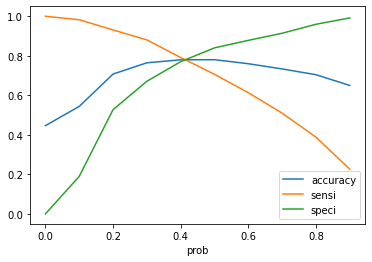

In [820]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From above plot of Accuracy, Sensitivity and Specificity 0.4 looks to be a 4.2 looks to be the optimal value

In [821]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

# Let's see the head
y_train_pred_final = y_train_pred_final[['Converted','Conversion_Prob','Predicted']]

In [822]:
y_train_pred_final

,Converted,Conversion_Prob,Predicted
8708,0,0.127904,0
567,0,0.224111,0
1404,1,0.337160,0
4025,1,0.773089,1
7751,0,0.165387,0
...,...,...,...
7929,1,0.860401,1
3757,1,0.108496,0
725,1,0.462049,1
114,1,0.389505,0


#### Accuracy for cut off .42

In [823]:
accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.7834599649327878

## 7) Making prediction on test data set

In [824]:
y_test = df_test.pop('Converted')

In [825]:
X_test = df_test

In [826]:
X_train.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [827]:
df_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(df_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [828]:
X_test = X_test[['Do Not Email', 'Total Time Spent on Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable',
       'What is your current occupation_Working Professional']]

In [829]:
X_test_sm = sm.add_constant(X_test)

In [830]:
y_test_pred = lr_model.predict(X_test_sm)

In [832]:
y_test_pred_final = pd.DataFrame({'Actual':y_test,'predicted_prob':y_test_pred})

In [834]:
y_test_pred_final['predicted'] = y_test_pred_final['predicted_prob'].apply(lambda x:1 if x>.42 else 0)

In [835]:
y_test_pred_final

,Actual,predicted_prob,predicted
6718,0,0.034996,0
1900,1,0.635003,1
259,0,0.143371,0
4899,1,0.195540,0
561,0,0.851695,1
...,...,...,...
2977,1,0.393837,0
7745,0,0.731282,1
1961,1,0.714914,1
3390,1,0.484960,1


In [836]:
accuracy_score(y_test_pred_final.Actual,y_test_pred_final.predicted)

0.7845944103612815

In [837]:
confusion_matrix(y_test_pred_final.Actual,y_test_pred_final.predicted)

array([[656, 179],
       [137, 495]], dtype=int64)

### Accuracy score for train and test data set is 78%. Model is good for predicting the lead conversion

## 8) Calculating score for the test data set

In [840]:
Lead_Rank = y_test_pred*100

In [843]:
Lead_Rank

6718     3.499601
1900    63.500294
259     14.337084
4899    19.554016
561     85.169498
          ...    
2977    39.383684
7745    73.128213
1961    71.491374
3390    48.496037
7888    61.952524
Length: 1467, dtype: float64